In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/microsoft-stock-price-prediction-with-ml/MicrosoftStock.csv')
data = df
data.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [3]:
data.date = pd.to_datetime(data.date)
data.info()
data.Name.value_counts()
data.drop(columns = 'Name', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1259 non-null   int64         
 1   date    1259 non-null   datetime64[ns]
 2   open    1259 non-null   float64       
 3   high    1259 non-null   float64       
 4   low     1259 non-null   float64       
 5   close   1259 non-null   float64       
 6   volume  1259 non-null   int64         
 7   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 78.8+ KB


In [4]:
data.head(10)

,index,date,open,high,low,close,volume
0,390198,2013-02-08,27.3500,27.71,27.310,27.550,33318306
1,390199,2013-02-11,27.6500,27.92,27.500,27.860,32247549
2,390200,2013-02-12,27.8800,28.00,27.750,27.880,35990829
3,390201,2013-02-13,27.9300,28.11,27.880,28.030,41715530
4,390202,2013-02-14,27.9200,28.06,27.870,28.040,32663174
5,390203,2013-02-15,28.0400,28.16,27.875,28.010,49650538
6,390204,2013-02-19,27.8801,28.09,27.800,28.045,38804616
7,390205,2013-02-20,28.1300,28.20,27.830,27.870,44109412
8,390206,2013-02-21,27.7400,27.74,27.230,27.490,49078338
9,390207,2013-02-22,27.6800,27.76,27.480,27.760,31425726


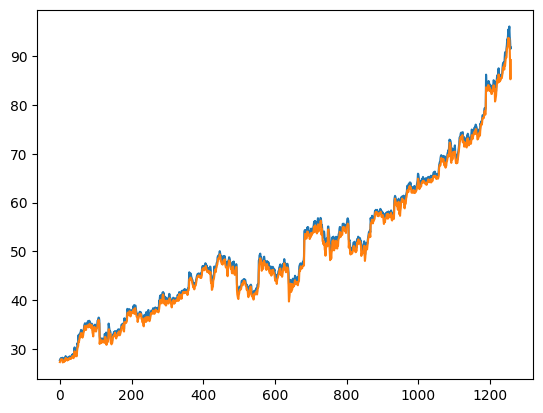

In [5]:
import matplotlib.pyplot as plt
data.high.plot()
data.low.plot()
# data.close.plot()
plt.show()

In [6]:
days = data[(data.date > '2013-02-08') & (data.date < '2013-04-01')]
# days

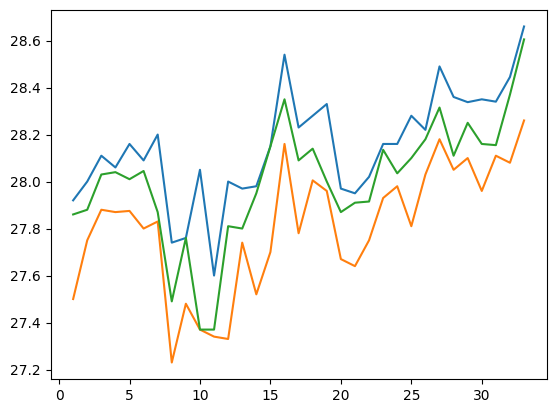

In [7]:
days.high.plot()
days.low.plot()
days.close.plot()
plt.show()

# XGBoost

In [8]:
data.head()

,index,date,open,high,low,close,volume
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174


In [9]:
data['dayofweek']=data.date.dt.dayofweek
data['quarter']=data.date.dt.quarter
data['month']=data.date.dt.month
data['year']=data.date.dt.year
data['dayofyear']=data.date.dt.dayofyear
data.head()

,index,date,open,high,low,close,volume,dayofweek,quarter,month,year,dayofyear
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,4,1,2,2013,39
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,0,1,2,2013,42
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,1,1,2,2013,43
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,2,1,2,2013,44
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,3,1,2,2013,45


In [10]:
data.corr()
import seaborn as sns
# plt.figure(figsize=(8,6))
# sns.heatmap(data.corr())

In [11]:
x = data.drop(columns = ['date','close'])
y = data.close
xtrain, ytrain = x[data.date < '2017-04-01'], y[data.date < '2017-04-01']
xtest, ytest = x[data.date >= '2017-04-01'], y[data.date >= '2017-04-01']
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)


(1044, 10) (1044,) (215, 10) (215,)


In [12]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.05, subsample=0.8)
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
preds = xgb.predict(xtest)
newpred = pd.DataFrame(data={'preds': preds, 'actual': ytest})
# ytest.shape

In [14]:
newpred['diff'] = abs(newpred['preds']-newpred['actual'])
newpred.sort_values('diff', ascending=False)
# newpred.head(10)

,preds,actual,diff
1253,65.535255,95.01,29.474745
1251,65.193932,93.92,28.726068
1254,65.600830,94.26,28.659170
1250,65.663445,94.06,28.396555
1252,65.452286,92.74,27.287714
...,...,...,...
1044,65.431328,65.55,0.118672
1050,65.526054,65.48,0.046054
1048,65.714142,65.68,0.034142
1047,65.701233,65.73,0.028767


In [15]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(preds, ytest)
mae

10.962394023096838